# planck fitの結果を確認する用

In [29]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


In [30]:
from modules.file_format.HDF5 import HDF5Reader


# データパス

In [31]:
dist_path_separate = '/Volumes/T7 Touch/T_calculation/planck_fit_dist/OIbDia08/OIbDia08_ 04_separate_half_p45e-2_dist.hdf'
dist_path_whole = '/Volumes/T7 Touch/T_calculation/planck_fit_dist/OIbDia08/OIbDia08_ 04_whole_p45e-2_dist.hdf'

In [32]:
separate = HDF5Reader(dist_path_separate)
whole = HDF5Reader(dist_path_whole)

HDF5ファイルが見つかりました: /Volumes/T7 Touch/T_calculation/planck_fit_dist/OIbDia08/OIbDia08_ 04_separate_half_p45e-2_dist.hdf
HDF5ファイルが見つかりました: /Volumes/T7 Touch/T_calculation/planck_fit_dist/OIbDia08/OIbDia08_ 04_whole_p45e-2_dist.hdf


# 温度と露光強度

In [33]:
separate_dist = separate.find_by('value/T')
whole_dist = whole.find_by('value/T')

max_instensity = whole.find_by('intensity')

「value/T」で検索します。
	-> entry/value/T を返しました。
「value/T」で検索します。
	-> entry/value/T を返しました。
「intensity」で検索します。
	-> entry/spe/2d_max_intensity を返しました。


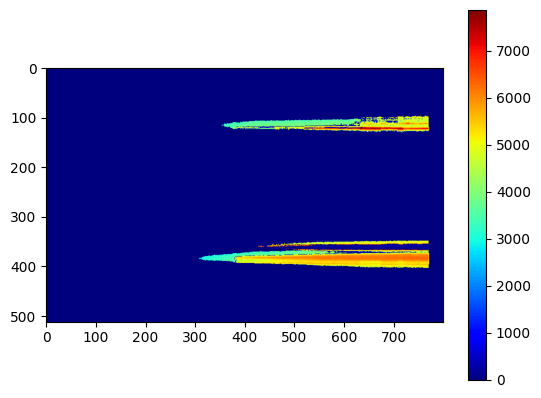

In [34]:
plt.imshow(whole_dist.T, cmap='jet')
plt.colorbar()
plt.show()
plt.close()

In [35]:
whole_dist.shape, max_instensity.shape

whole_adopted_dist = whole_dist.copy()
whole_adopted_dist[max_instensity < 5_000] = np.nan

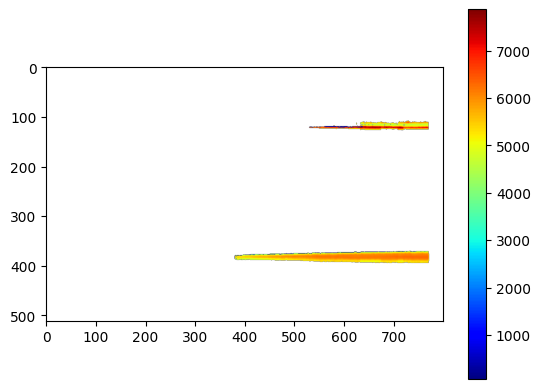

In [36]:

plt.imshow(whole_adopted_dist.T, cmap='jet')
plt.colorbar()
plt.show()
plt.close()

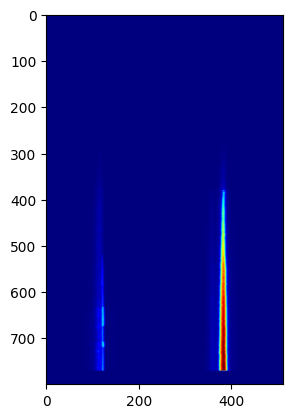

In [37]:
plt.imshow(max_instensity, cmap='jet')

(350.0, 400.0)

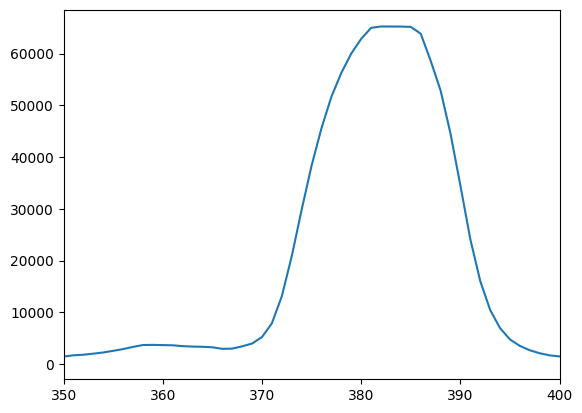

In [38]:
plt.plot(max_instensity.max(axis=0))
plt.xlim(350, 400)

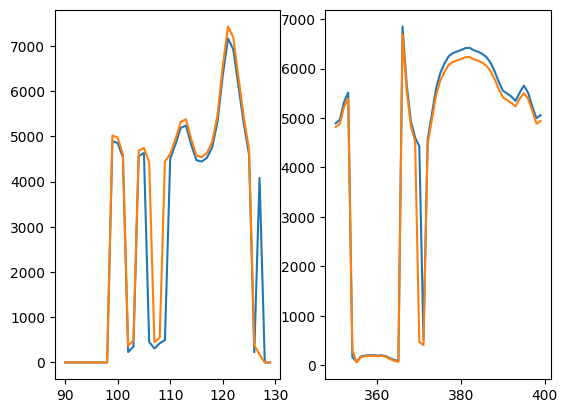

In [39]:
fig, axes = plt.subplots(1, 2)

from1 = 90
to1 = 130
axes[0].plot(np.arange(from1, to1), separate_dist[700, from1:to1])
axes[0].plot(np.arange(from1, to1), whole_dist[700, from1:to1])
from2 = 350
to2 = 400
axes[1].plot(np.arange(from2, to2), separate_dist[700, from2:to2])
axes[1].plot(np.arange(from2, to2), whole_dist[700, from2:to2])


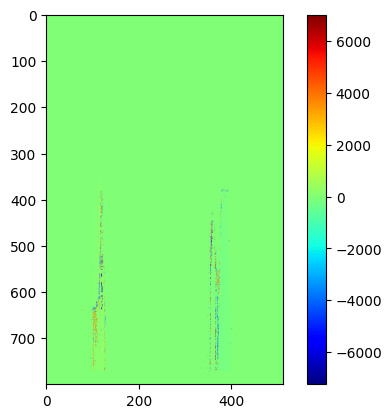

In [40]:
diff_T = whole_dist-separate_dist

plt.imshow(diff_T, cmap='jet')
plt.colorbar()

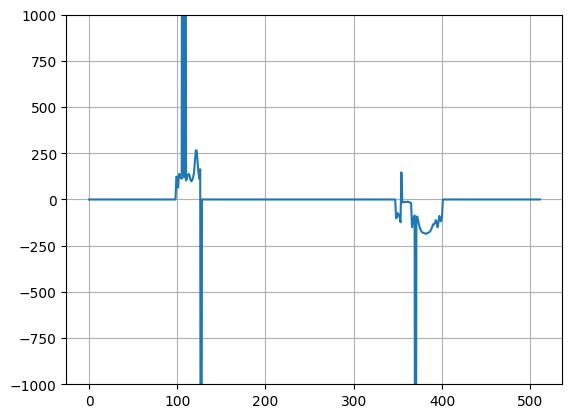

In [41]:
plt.plot(diff_T[700])
plt.ylim(-1_000, 1_000)
plt.grid(True)

# 温度誤差

In [42]:
separate_error = separate.find_by('error/T')

「error/T」で検索します。
	-> entry/error/T を返しました。


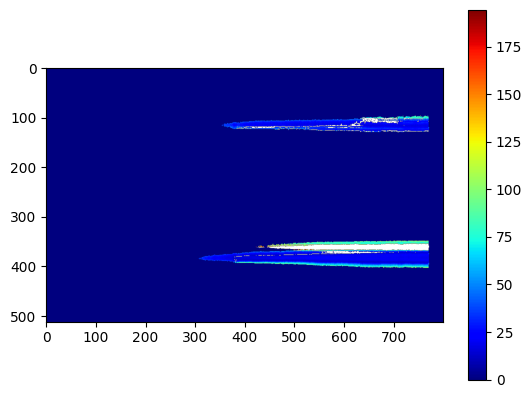

In [43]:
plt.imshow(separate_error.T, cmap='jet')
plt.colorbar()

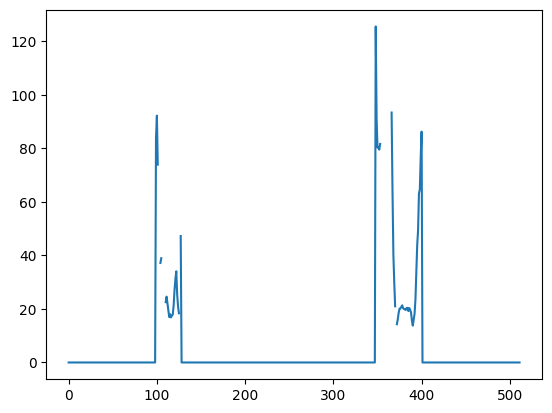

In [44]:
plt.plot(separate_error[700])

# scale

In [45]:
separate_scale = separate.find_by('value/scale')

「value/scale」で検索します。
	-> entry/value/scale を返しました。


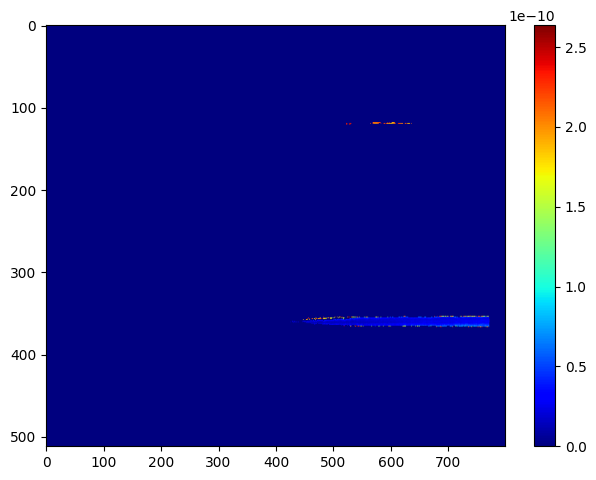

In [46]:
plt.imshow(separate_scale.T, cmap='jet', aspect='auto')
plt.tight_layout()
plt.colorbar()

In [49]:
logged_scale = np.zeros_like(separate_scale)
non_zero_mask = separate_error > 0
logged_scale[non_zero_mask] = np.log10(separate_scale[non_zero_mask])

/var/folders/lf/1z5g9_557nzf78kbnnnvx7m80000gn/T/ipykernel_8124/1417617826.py:3: RuntimeWarning: invalid value encountered in log10
  logged_scale[non_zero_mask] = np.log10(separate_scale[non_zero_mask])


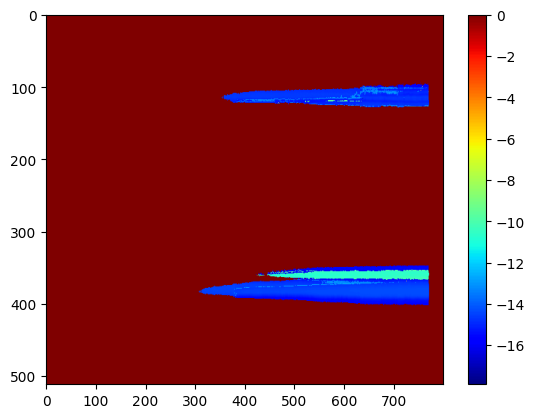

In [51]:
plt.imshow(logged_scale.T, cmap='jet', aspect='auto')
plt.colorbar()